In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
!pip install xlrd
!pip install openpyxl

df = pd.read_excel('Sales data.xlsx', engine='openpyxl')
df.head()

,Date,Time,Banner,Channel,transaction_id,seq_number,product_id,retail_id,payment_method,quantity,total_amount,total_purchase,sales_price,sales_price_tax,purchase_price,price_diff
0,2021-12-01,06:51,Tehnomanija,B2B,110055221,1,135226,1100,6,1,25989.99996,19083.00,21658.3333,25989.99996,19083.00,2575.3333
1,2021-12-01,06:51,Tehnomanija,B2B,110055221,2,137166,1100,6,1,9990.00000,9707.61,8325.0000,9990.00000,9707.61,-1382.6100
2,2021-12-01,06:51,Tehnomanija,B2B,110055221,3,142961,1100,6,1,40989.99996,35276.00,34158.3333,40989.99996,35276.00,-1117.6667
3,2021-12-01,06:51,Tehnomanija,B2B,110055221,4,157291,1100,6,1,38390.00004,33993.20,31991.6667,38390.00004,33993.20,-2001.5333
4,2021-12-01,06:56,Tehnomanija,B2B,110055222,1,142776,1100,6,1,12990.00000,10700.00,10825.0000,12990.00000,10700.00,125.0000


In [6]:
df.shape

(54111, 17)

In [7]:
'''Lets count the number of products'''
df.product_id.value_counts()

161550    1208
156653     802
161549     746
900025     595
156654     519
          ... 
155020       1
147423       1
149488       1
105844       1
154355       1
Name: product_id, Length: 6642, dtype: int64

In [5]:
df['purchase_price'] = np.where(df['purchase_price'] == 0, df['sales_price '], df['purchase_price'])
df['sales_price '] = np.where(df['sales_price '] == 0, df['purchase_price'], df['sales_price '])

df['ratio'] = df['sales_price '] / df.purchase_price

<AxesSubplot:>

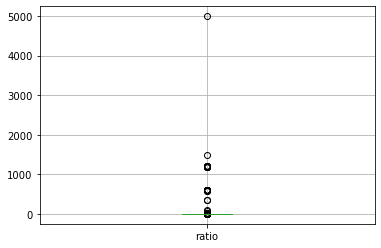

In [7]:
df.boxplot(column=['ratio'])

In [4]:
df['ratio'].nlargest(5)

19782    4991.670000
5464     1491.667500
28045    1199.860169
44876    1199.860169
44877    1199.860169
Name: ratio, dtype: float64

In [12]:
'''Margin without tax'''
print(round(100*(df['ratio'].mean()-1), 2), '%')

96.35 %


In [13]:
'''Standard deviation margin'''
np.std(df['ratio'])

29.146620128174046

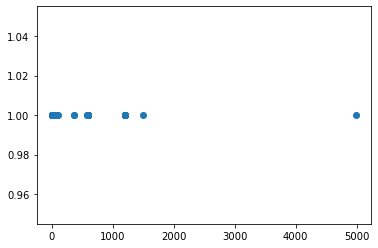

In [14]:
plt.scatter(df.ratio, np.ones(len(df.ratio)))

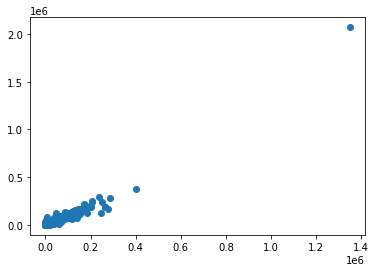

In [15]:
plt.scatter(df.purchase_price, df['sales_price '])

# Welcome to Jupyter!

This repo contains an introduction to [Jupyter](https://jupyter.org) and [IPython](https://ipython.org).

Outline of some basics:

* [Notebook Basics](../examples/Notebook/Notebook%20Basics.ipynb)
* [IPython - beyond plain python](../examples/IPython%20Kernel/Beyond%20Plain%20Python.ipynb)
* [Markdown Cells](../examples/Notebook/Working%20With%20Markdown%20Cells.ipynb)
* [Rich Display System](../examples/IPython%20Kernel/Rich%20Output.ipynb)
* [Custom Display logic](../examples/IPython%20Kernel/Custom%20Display%20Logic.ipynb)
* [Running a Secure Public Notebook Server](../examples/Notebook/Running%20the%20Notebook%20Server.ipynb#Securing-the-notebook-server)
* [How Jupyter works](../examples/Notebook/Multiple%20Languages%2C%20Frontends.ipynb) to run code in different languages.

You can also get this tutorial and run it on your laptop:

    git clone https://github.com/ipython/ipython-in-depth

Install IPython and Jupyter:

with [conda](https://www.anaconda.com/download):

    conda install ipython jupyter

with pip:

    # first, always upgrade pip!
    pip install --upgrade pip
    pip install --upgrade ipython jupyter

Start the notebook in the tutorial directory:

    cd ipython-in-depth
    jupyter notebook